In [17]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 

from typing import Any, Optional, List
import asyncio
import nest_asyncio
nest_asyncio.apply()

import qubx
%qubxd

%load_ext autoreload
%autoreload 2

from qubx import lookup, logger, QubxLogConfig
from qubx.core.interfaces import IStrategy
from qubx.core.context import StrategyContext
# from qubx.impl.ccxt_connector import CCXTDataConnector
# from qubx.impl.ccxt_trading import CCXTSyncTradingConnector
from qubx.utils.runner import get_account_config, _run_in_jupyter
from qubx.pandaz import scols

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Old runs (not actual now)

In [2]:
%load_ext autoreload
%autoreload 2
from strats.teststrat import FlipFlopStrat

symbols = ['PEPE', 'SHIB', 'XVG', 'BOME', 'CKB', 'GALA', 'LINK'] 
instruments = [lookup.find_instrument('BINANCE', s, 'USDT') for s in symbols]

auth = get_account_config('binance-qbx', './configs/.env')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
brok = CCXTSyncTradingConnector('binance', **auth)
data = CCXTDataConnector('binance', brok, **auth)

ctx = StrategyContext(
    FlipFlopStrat(), dict(
        capital_invested=100,
        trading_allowed=False
    ), 
    data, brok, instruments=instruments,  # type: ignore
    md_subscription=dict(type='ohlc', timeframe='5Min', nback=100),
    trigger_spec='1Min -5Sec'
)
S = ctx.strategy

2024-07-10 16:28:32.533 [ ℹ️ ] BINANCE loading ...
2024-07-10 16:28:38.038 [ ℹ️ ] Loading account data for Binance
2024-07-10 16:28:39.055 [ ℹ️ ]  > 0.048 of BNB is reserved from trading
2024-07-10 16:28:39.055 [ ℹ️ ] binance initialized - current time 2024-07-10T13:28:39.236930560
2024-07-10 16:28:39.055 [ ⚠️ ] qubx.core.loggers:__init__:324 - Log writer is not defined - strategy activity will not be saved !
2024-07-10 16:28:39.055 [ ℹ️ ] (StrategyContext) set strategy parameters:
	set capital_invested <- 100
	set trading_allowed <- False
2024-07-10 16:28:39.055 [ 🐞 ] Triggering strategy on every 1Min bar after 55S


In [4]:
ctx.start()

2024-07-10 16:28:50.876 [ ℹ️ ] (StrategyContext) Subscribing to ohlc updates using {'timeframe': '5Min', 'nback': 100} for 
	['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT', 'BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT'] 
2024-07-10 16:28:50.892 [ ℹ️ ] Subscribed on ohlc updates for 7 symbols: 
		['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT', 'BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']
2024-07-10 16:28:50.892 [ ℹ️ ] > Started with capital 100
2024-07-10 16:28:50.892 [ ℹ️ ] (StrategyContext) Start processing market data
2024-07-10 16:28:50.892 [ ℹ️ ] (StrategyContext) strategy is started


2024-07-10 16:28:54.747 [ ℹ️ ] PEPEUSDT: loaded 100 5m bars
2024-07-10 16:28:54.885 [ ℹ️ ] LINKUSDT: loaded 100 5m bars
2024-07-10 16:28:54.908 [ ℹ️ ] GALAUSDT: loaded 100 5m bars
2024-07-10 16:28:54.912 [ ℹ️ ] CKBUSDT: loaded 100 5m bars
2024-07-10 16:28:54.917 [ ℹ️ ] XVGUSDT: loaded 100 5m bars
2024-07-10 16:28:54.919 [ ℹ️ ] SHIBUSDT: loaded 100 5m bars
2024-07-10 16:28:54.922 [ ℹ️ ] BOMEUSDT: loaded 100 5m bars
2024-07-10 16:28:54.930 [ 🐞 ] [2024-07-10T13:28:55.111627776]: Invoking FlipFlopStrat on_fit('2024-07-10 13:28:39.236930560', 'None')
2024-07-10 16:28:54.934 [ ℹ️ ] > Fit is called | fit_time: 2024-07-10 13:28:39.236930560 / prev: None
2024-07-10 16:28:54.938 [ ℹ️ ]                         close     close     close     close     close  \
2024-07-10 05:10:00  0.000009  0.000017  0.003890  0.007904  0.010488   
2024-07-10 05:15:00  0.000009  0.000017  0.003892  0.007887  0.010406   
2024-07-10 05:20:00  0.000009  0.000017  0.003891  0.007916  0.010431   
2024-07-10 05:25:00  0.

In [9]:
pd.DataFrame(brok.acc.positions_report()).T

,Qty,Price,PnL,MktValue
PEPEUSDT,0.0,0.0,0.0,0.0
SHIBUSDT,0.0,0.0,0.0,0.0
XVGUSDT,0.0,0.0,0.0,0.0
BOMEUSDT,0.0,0.0,0.0,0.0
CKBUSDT,0.0,0.0,0.0,0.0
GALAUSDT,0.0,0.0,0.0,0.0
LINKUSDT,0.0,0.0,0.0,0.0


In [10]:
ctx.get_capital()

38.87382627

In [5]:
r = data.get_historical_ohlcs('LINKUSDT', '5Min', 10)
r

[{o:12.810000 | h:12.832000 | l:12.796000 | c:12.809000 | v:5782.390000},
 {o:12.806000 | h:12.842000 | l:12.759000 | c:12.841000 | v:13888.450000},
 {o:12.838000 | h:12.859000 | l:12.827000 | c:12.850000 | v:6130.810000},
 {o:12.845000 | h:12.891000 | l:12.836000 | c:12.890000 | v:8174.730000},
 {o:12.891000 | h:12.939000 | l:12.843000 | c:12.856000 | v:16949.200000},
 {o:12.858000 | h:12.899000 | l:12.858000 | c:12.887000 | v:2945.340000},
 {o:12.889000 | h:12.923000 | l:12.867000 | c:12.923000 | v:11723.910000},
 {o:12.926000 | h:12.928000 | l:12.891000 | c:12.900000 | v:5486.010000},
 {o:12.903000 | h:12.916000 | l:12.843000 | c:12.859000 | v:14186.580000},
 {o:12.859000 | h:12.874000 | l:12.830000 | c:12.847000 | v:7362.680000}]

In [7]:
ctx.stop()
data.close()

2024-07-10 16:29:04.032 [ ℹ️ ] > test is stopped
2024-07-10 16:29:04.032 [ ℹ️ ] 	CachedMarketDataHolder.update_by_bar took 0.0000586 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	StrategyContext.handler took 0.0000110 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	StrategyContext._process_incoming_data took 1.3296732 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	loggers.notify took 0.0000020 secs
2024-07-10 16:29:04.042 [ ℹ️ ] 	CachedMarketDataHolder.get_ohlcv took 0.0000136 secs
2024-07-10 16:29:04.043 [ ℹ️ ] 	strategy.on_fit took 0.0082204 secs
2024-07-10 16:29:04.044 [ ℹ️ ] 	StrategyContext._processing_bar took 0.0000917 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	CachedMarketDataHolder.update_by_bar took 0.0000586 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	StrategyContext.handler took 0.0000110 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	StrategyContext._process_incoming_data took 1.3296732 secs
2024-07-10 16:29:04.032 [ ℹ️ ] 	loggers.notify took 0.0000020 secs
2024-07-10 16:29:04.042 [ ℹ️ ] 	CachedMarketDataHolder.get_ohlcv too

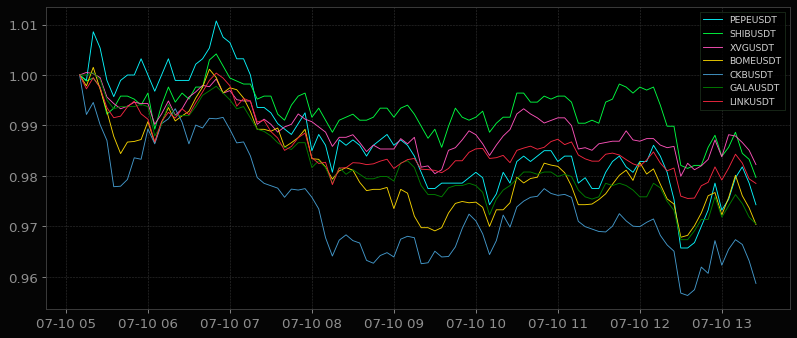

In [6]:
N = lambda x: x / x.iloc[0]
for s, hh in S.ohlcs('5Min').items():
    plt.plot(N(hh.close), label=s)
plt.legend()

# Jupyter tests

In [28]:
QubxLogConfig.set_log_level("DEBUG")

In [29]:
_run_in_jupyter("test", "test", ["./", "test/"])

2024-12-19 12:07:28.873 [ ℹ️ ] (runner) Running in Jupyter console


MultipleInstanceError: An incompatible sibling of 'TerminalRunner' is already instantiated as singleton: IPKernelApp

In [20]:
# from jupyter_

ModuleNotFoundError: No module named 'jupyter_console'